<a href="https://colab.research.google.com/github/nesrinyakar/UrbanSoundsClassificationProject-GAIH/blob/main/Model%26Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X_train = np.load("/content/drive/MyDrive/datasets/X_train.npy")
X_test = np.load("/content/drive/MyDrive/datasets/X_test.npy")
X_val = np.load("/content/drive/MyDrive/datasets/X_val.npy")
y_train = np.load("/content/drive/MyDrive/datasets/y_train.npy")
y_test = np.load("/content/drive/MyDrive/datasets/y_test.npy")
y_val = np.load("/content/drive/MyDrive/datasets/y_val.npy")

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(100,100, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(100,100, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(100,100, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.8))

model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.8))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

results = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_val, y_val))



Epoch 1/50
110/110 [==============================] - 128s 1s/step - loss: 2.2725 - accuracy: 0.1327 - val_loss: 2.2003 - val_accuracy: 0.2428
Epoch 2/50
110/110 [==============================] - 119s 1s/step - loss: 2.1841 - accuracy: 0.1686 - val_loss: 2.0609 - val_accuracy: 0.2417
Epoch 3/50
110/110 [==============================] - 120s 1s/step - loss: 2.0728 - accuracy: 0.2049 - val_loss: 1.8946 - val_accuracy: 0.3826
Epoch 4/50
110/110 [==============================] - 120s 1s/step - loss: 1.9909 - accuracy: 0.2424 - val_loss: 1.7584 - val_accuracy: 0.4559
Epoch 5/50
110/110 [==============================] - 121s 1s/step - loss: 1.9212 - accuracy: 0.2757 - val_loss: 1.6892 - val_accuracy: 0.4536
Epoch 6/50
110/110 [==============================] - 118s 1s/step - loss: 1.8396 - accuracy: 0.3069 - val_loss: 1.6018 - val_accuracy: 0.4662
Epoch 7/50
110/110 [==============================] - 119s 1s/step - loss: 1.8176 - accuracy: 0.3258 - val_loss: 1.5394 - val_accuracy: 0.4880

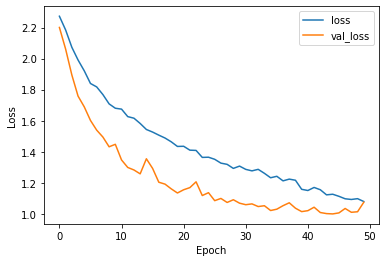

In [8]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

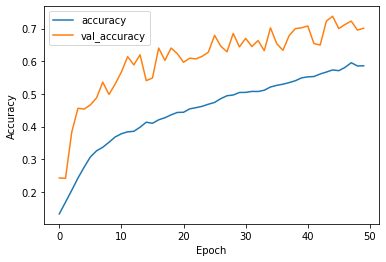

In [9]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 4s 139ms/step - loss: 0.9938 - accuracy: 0.7048


[0.993831217288971, 0.7048054933547974]

In [11]:
prediction_result = model.predict(X_test[788].reshape((1,100, 100, 1)))
prediction_result

array([[1.8670238e-03, 3.3103576e-14, 7.8927831e-14, 1.0026196e-05,
        4.2368752e-01, 4.9394764e-02, 2.7870503e-12, 5.2504063e-01,
        3.5976776e-15, 6.9166872e-15]], dtype=float32)

In [12]:
#Predicted class
predicted_class = prediction_result.argmax()
#Predicted probability
predicted_probability = prediction_result.max()

In [13]:
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability.")

This image belongs to class 7 with 0.5250406265258789 probability.
